Гипотезы:


1.   YOLO Сегментация человека на реальном изобравений. Фон однородный/неоднородный.
2.   YOLO Сегменрация ситетического человека с сложным фоном/с однородным фоном котрастноо оттенка.

Идея: Интерактивная сегментация примеров, дообучение YOLO



In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 27.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolo11m-seg.pt")  # load an official model

In [ ]:
import cv2

img1 = cv2.imread('/content/pic1_1.jpg')
img2 = cv2.imread('/content/pic_2.jpg')

print(type(img1))
print(img1.shape)   #(w, h, ch)
print(img2.shape)

<class 'numpy.ndarray'>
(1333, 1000, 3)
(637, 600, 3)


In [ ]:
model.predict("/content/croped.jpg", save = True)


image 1/1 /content/croped.jpg: 448x640 1 person, 1773.3ms
Speed: 5.0ms preprocess, 1773.3ms inference, 4.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [ ]:
results = model(["/content/pic_1.jpg", "/content/pic_2.jpg"])


0: 640x608 1 person, 3202.7ms
1: 640x608 1 person, 3202.7ms
Speed: 4.3ms preprocess, 3202.7ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 608)


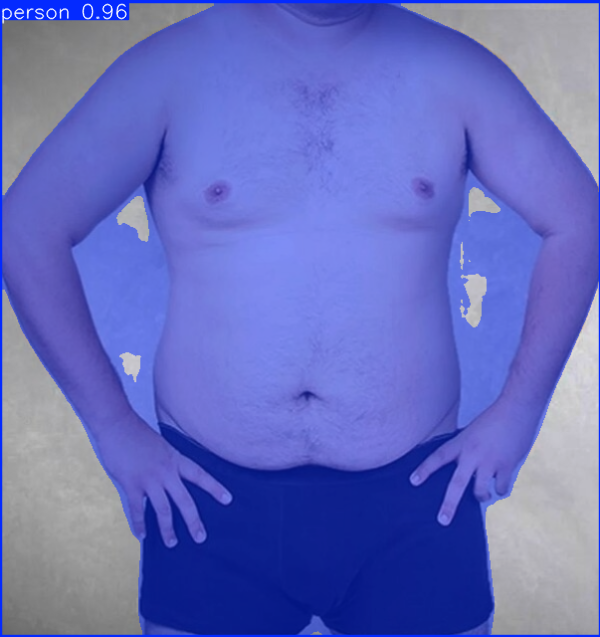

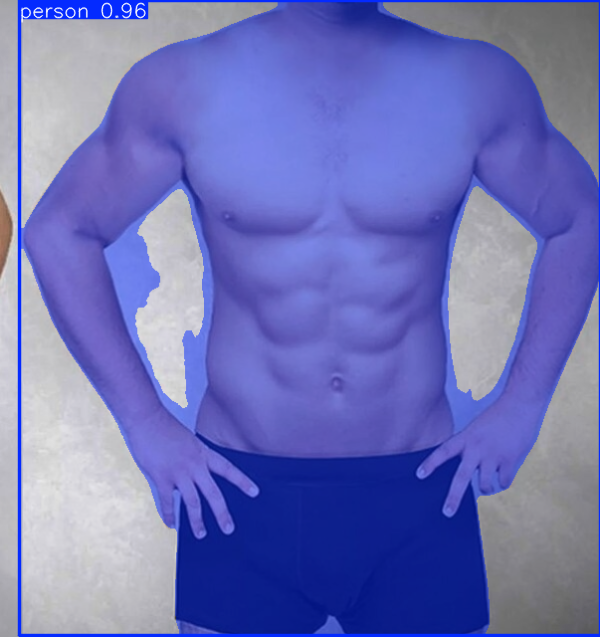

In [ ]:
for result in results:
    masks = result.masks  # Masks object for segmentation masks outputs
    result.show()  # display to screen

In [ ]:
model = YOLO("yolo11m-pose.pt")  # load an official model

100%|██████████| 40.5M/40.5M [00:00<00:00, 83.8MB/s]


In [ ]:
results = model(["/content/front.png", "/content/side.png", "/content/back.png"])



0: 384x640 1 person, 1285.9ms
1: 384x640 1 person, 1285.9ms
2: 384x640 1 person, 1285.9ms
Speed: 10.8ms preprocess, 1285.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


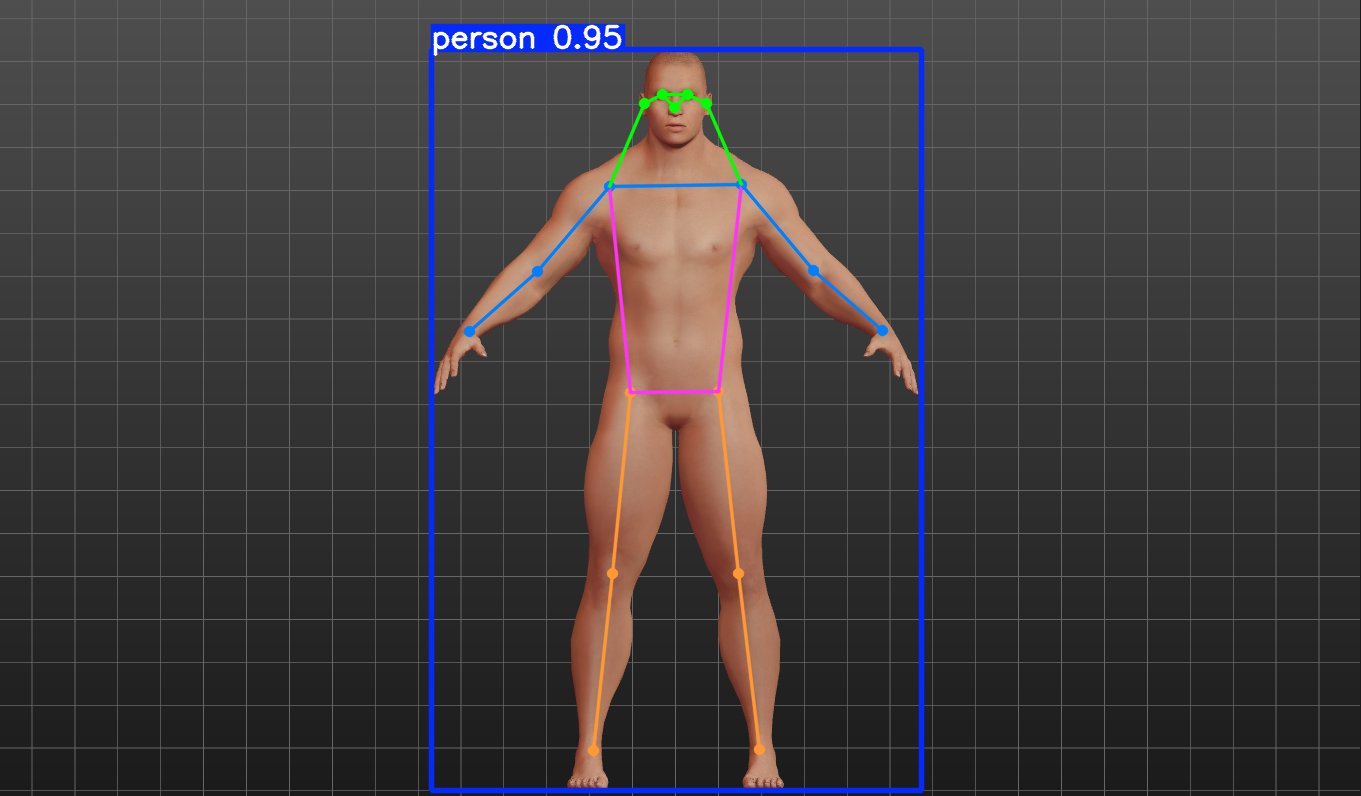

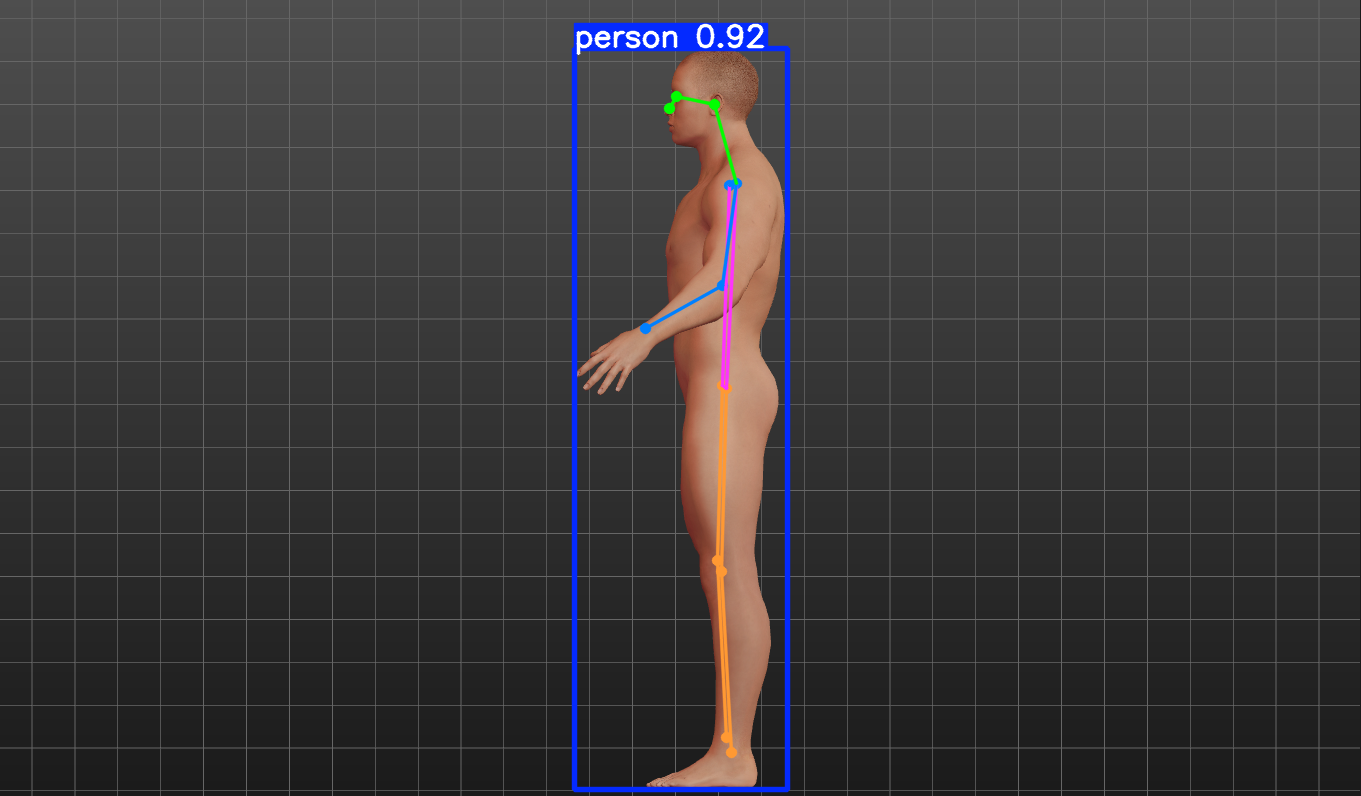

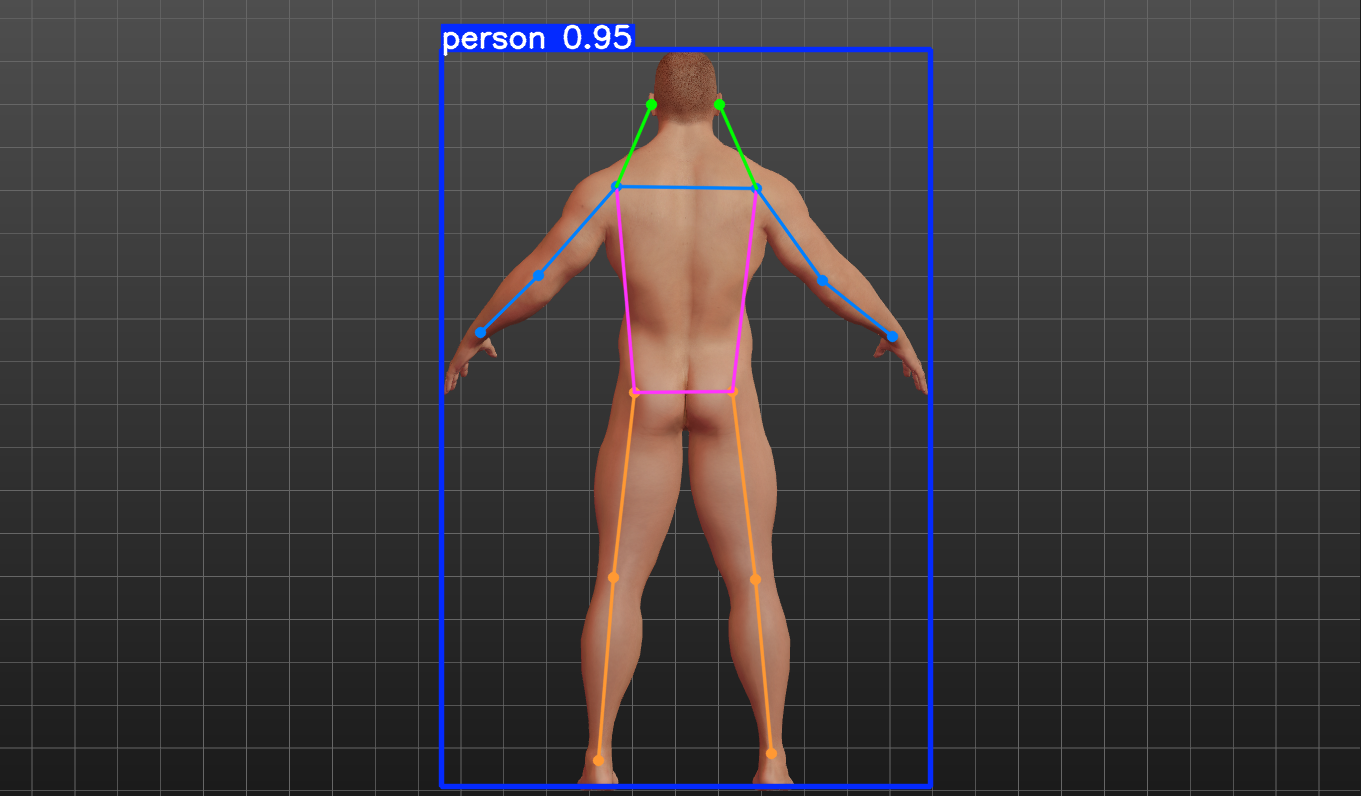

In [ ]:
for result in results:
    keypoints = result.keypoints  # Keypoints object for pose outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

In [ ]:
results = model(["/content/lfront.png", "/content/lback.png"])


0: 384x640 1 person, 1314.2ms
1: 384x640 1 person, 1314.2ms
Speed: 16.9ms preprocess, 1314.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


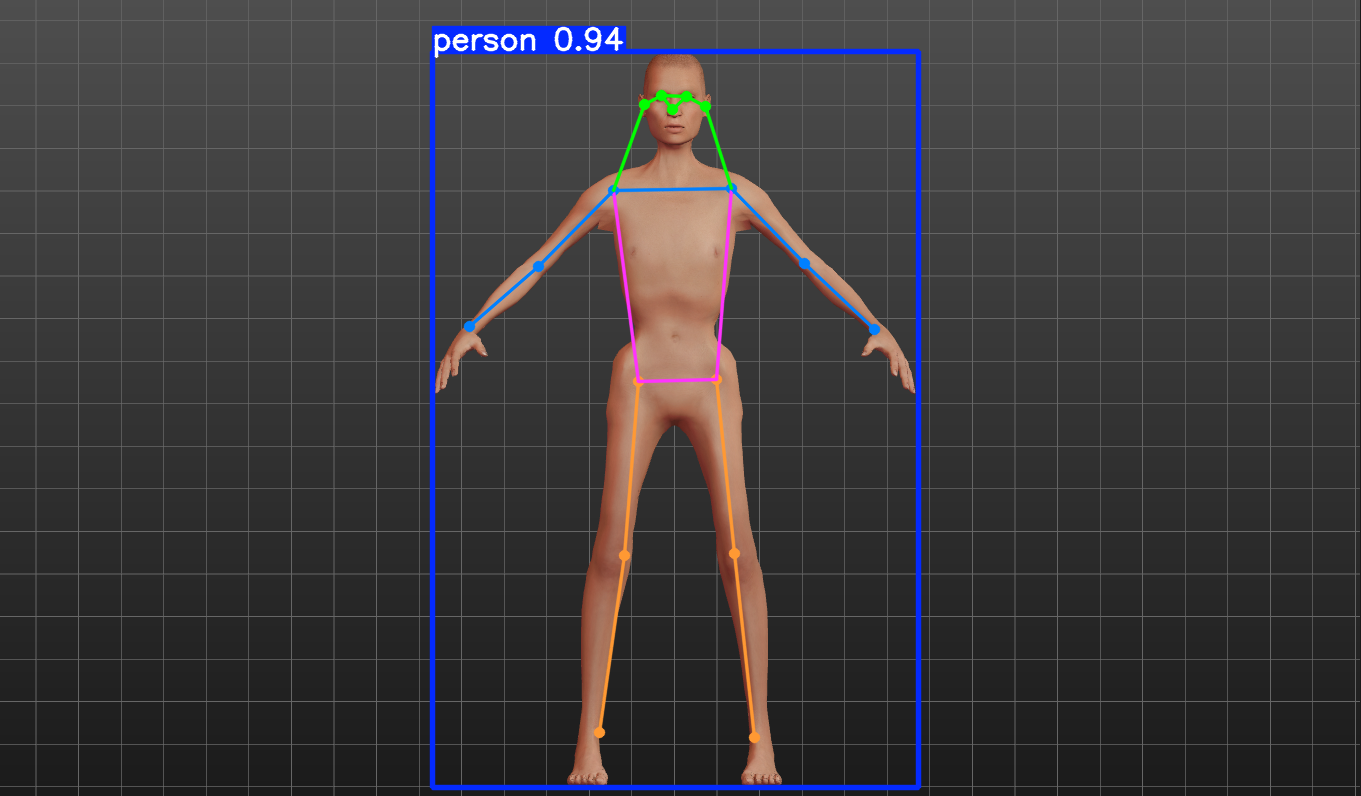

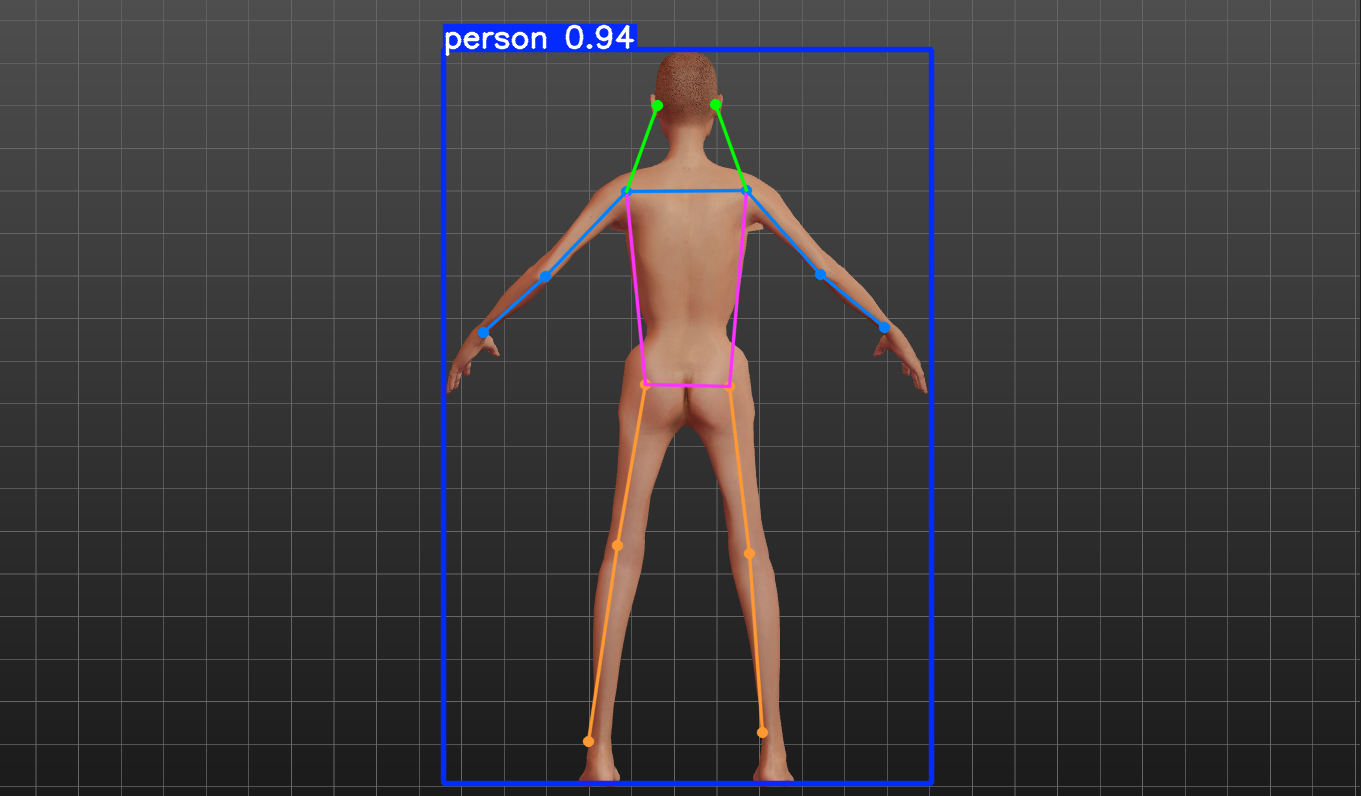

In [ ]:
for result in results:
    keypoints = result.keypoints  # Keypoints object for pose outputs
    result.show()  # display to screen

In [1]:
from tensorflow.keras.models import load_model

# Загрузка предобученной модели
model = load_model('deeplabv3_plus.h5')

# Предсказание
pred_mask = model.predict("/content/1.jpg")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'deeplabv3_plus.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)